In [2]:
#CAT vs DOG Classification using CNN keras

In [3]:
#import the required libraries
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [4]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [5]:
print(os.getcwd())

C:\Users\sphaniraj


In [6]:
filenames=os.listdir("./dogs-vs-cats/train")

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [7]:
print(df)

           filename  category
0         cat.0.jpg         0
1         cat.1.jpg         0
2        cat.10.jpg         0
3       cat.100.jpg         0
4      cat.1000.jpg         0
...             ...       ...
24995  dog.9995.jpg         1
24996  dog.9996.jpg         1
24997  dog.9997.jpg         1
24998  dog.9998.jpg         1
24999  dog.9999.jpg         1

[25000 rows x 2 columns]


In [8]:
#prepare the sequential DL model to train
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [9]:
#print the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [10]:
#set the callback parameters
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [11]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
print("Total train images ",total_train)
total_validate=validate_df.shape[0]
print("Total validate images ",total_validate)
batch_size=50

Total train images  20000
Total validate images  5000


In [12]:
#create the train and validation generator
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "./dogs-vs-cats/train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "./dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical'
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 1 validated image filenames belonging to 1 classes.


In [25]:
#train the model for 3 epochs with batch size=50
epochs=3
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

C:\Users\sphaniraj\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
400/400 [==============================] - 712s 2s/step - loss: 0.4327 - accuracy: 0.8007 - val_loss: 0.5531 - val_accuracy: 0.8174
Epoch 2/3
400/400 [==============================] - 721s 2s/step - loss: 0.4052 - accuracy: 0.8169 - val_loss: 0.3999 - val_accuracy: 0.8220
Epoch 3/3
400/400 [==============================] - 724s 2s/step - loss: 0.3755 - accuracy: 0.8336 - val_loss: 0.4370 - val_accuracy: 0.8176


In [90]:
#save the model
model.save("model_catsVSdogs_3epoch.h5")

In [13]:
import keras
model=keras.models.load_model("model_catsVSdogs_3epoch.h5")

NameError: name 'history' is not defined

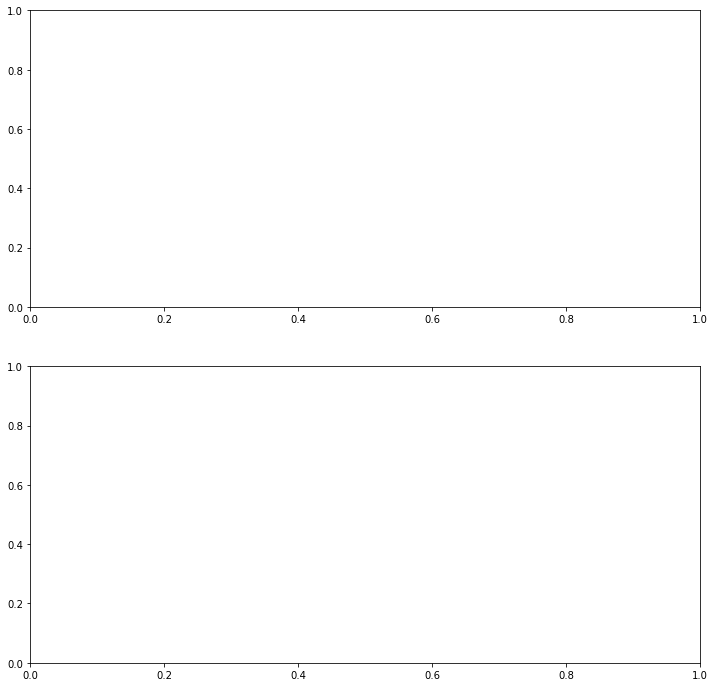

In [14]:
#print the accuracy and loss graph
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [15]:
test_filenames = os.listdir("./dogs-vs-cats/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
print("no of test samples", nb_samples)

no of test samples 12500


In [16]:
#create test generator
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./dogs-vs-cats/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=Image_Size,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [17]:
#predict the model on test data
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

C:\Users\sphaniraj\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [18]:
test_df['category'] = np.argmax(predict, axis=-1)
print(test_df['category'])

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
print(label_map)

test_df['category'] = test_df['category'].replace(label_map)
print(test_df['category'])

test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })
print(test_df['category'])

0        1
1        0
2        0
3        1
4        1
        ..
12495    1
12496    1
12497    1
12498    0
12499    0
Name: category, Length: 12500, dtype: int64
{0: 'cat', 1: 'dog'}
0        dog
1        cat
2        cat
3        dog
4        dog
        ... 
12495    dog
12496    dog
12497    dog
12498    cat
12499    cat
Name: category, Length: 12500, dtype: object
0        1
1        0
2        0
3        1
4        1
        ..
12495    1
12496    1
12497    1
12498    0
12499    0
Name: category, Length: 12500, dtype: int64


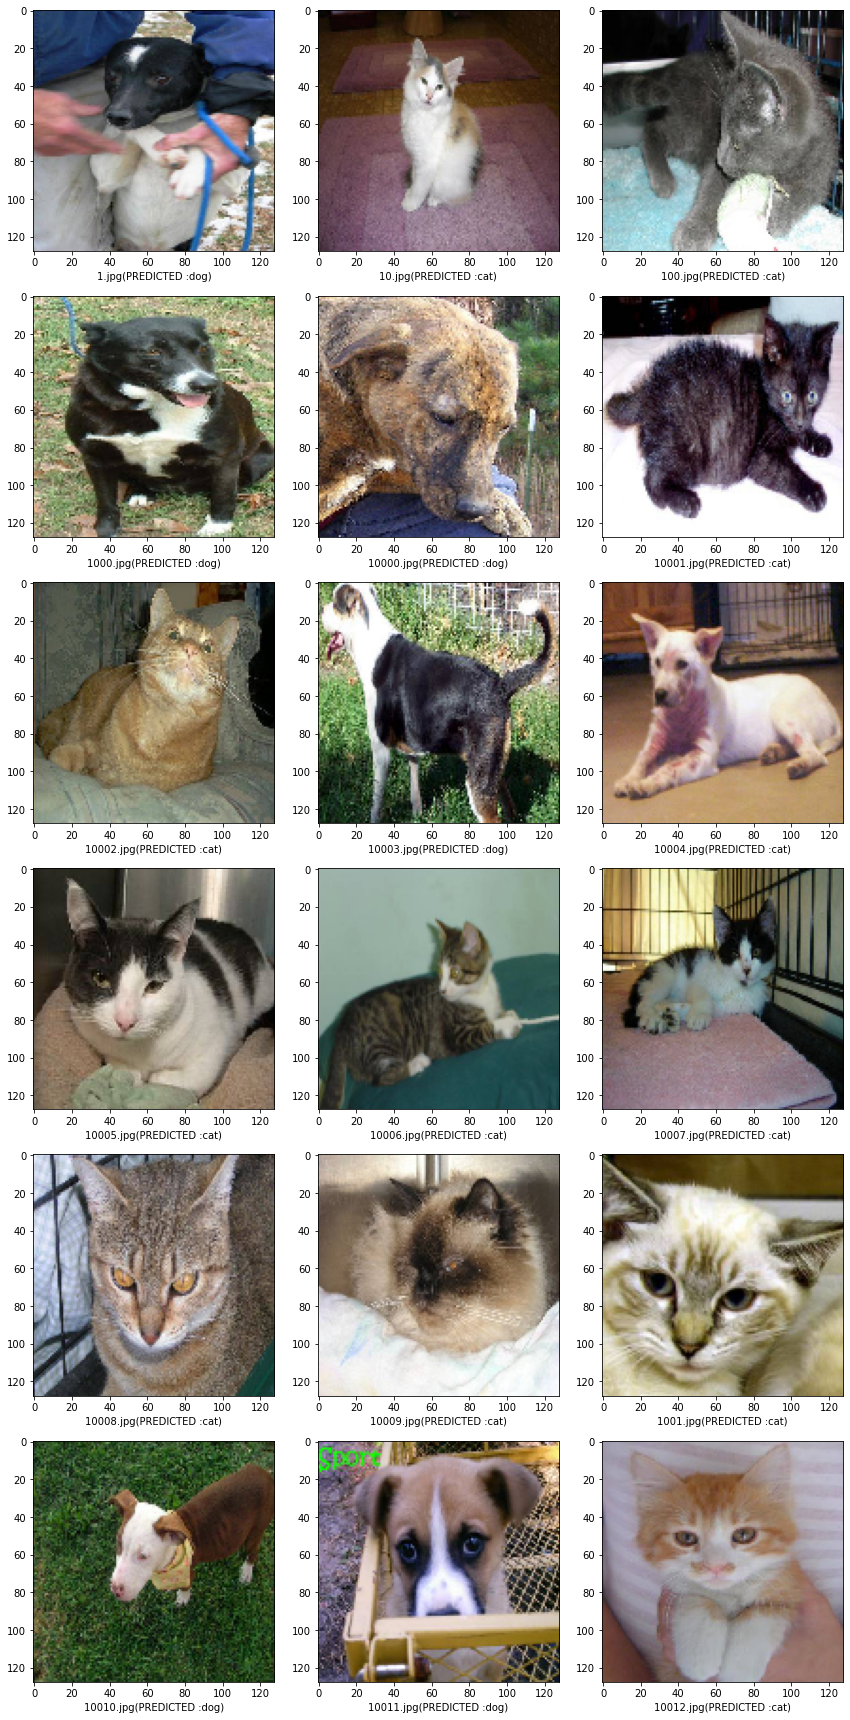

In [19]:
#test the predicted label on sample images
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    if category==1:
        category='dog'
    else:
        category='cat'
    img = load_img("./dogs-vs-cats/test1/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "PREDICTED :" + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

<AxesSubplot:>

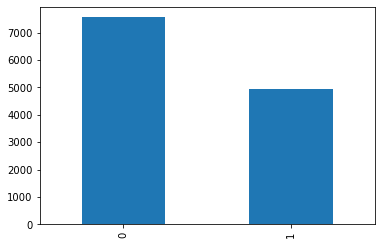

In [20]:
#keep track of total count on each category
test_df['category'].value_counts().plot.bar()

C:\Users\sphaniraj\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predicted value= 0
predicted Label= cat


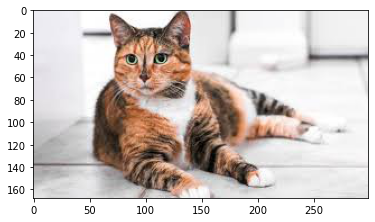

In [21]:
#predict the label on sample image of the cat
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("./dogs-vs-cats/cat.jpg")
plt.imshow(im)
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print("predicted value=",pred)
print("predicted Label=",results[pred])

predicted value= 1
predicted Label= dog


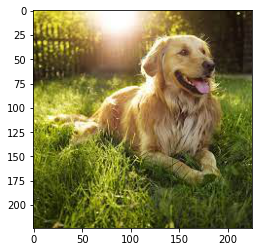

In [22]:
#predict the label on the sample image of dog
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("./dogs-vs-cats/dog.jpg")
plt.imshow(im)
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print("predicted value=",pred)
print("predicted Label=",results[pred])

predicted value= 0
predicted Label= cat


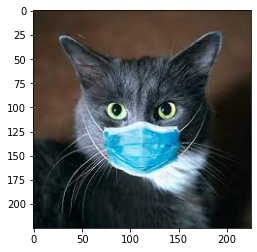

In [24]:
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("./cat1.jpg")
plt.imshow(im)
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print("predicted value=",pred)
print("predicted Label=",results[pred])

predicted value= 1
predicted Label= dog


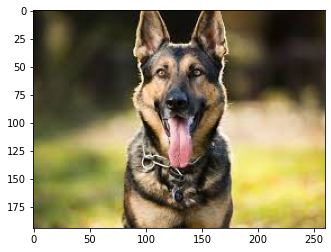

In [24]:
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("./dog2.jpg")
plt.imshow(im)
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print("predicted value=",pred)
print("predicted Label=",results[pred])

predicted value= 0
predicted Label= cat


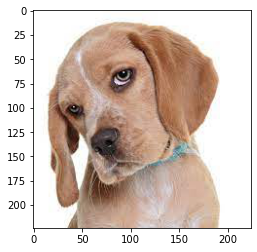

In [23]:
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("./dog1.jpg")
plt.imshow(im)
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print("predicted value=",pred)
print("predicted Label=",results[pred])

predicted value= 0
predicted Label= cat


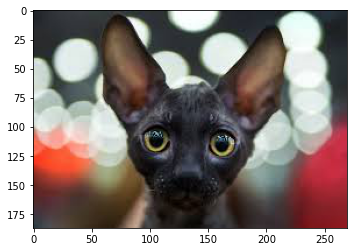

In [25]:
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("./cat2.jpg")
plt.imshow(im)
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print("predicted value=",pred)
print("predicted Label=",results[pred])

In [25]:
#write the output of test data to csv file
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)